Pour permmetre au banque de faire face au fraude bancaire nous allons mettre en place un modele de détection de fraude par carte bancaire 

In [10]:
# Ouverture du dataset

import pandas as pd
import numpy as np

data =  pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.drop(["CustomerID"], axis=1, inplace=True)

In [12]:
print(data)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [14]:
# Connaitre la taille du dataset
data.shape

(200, 4)

In [15]:
# vérifions si il y a des valeurs manquantes 
data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# Encodage de la variable qualitative gender
col_quali = data.select_dtypes(object)
col_quali

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [17]:
# Fonction pour encoder une variable qualitative 
def encoded_var_quali(data):
    data['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
    return data

In [18]:
data_encoded = encoded_var_quali(data)
data_encoded

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


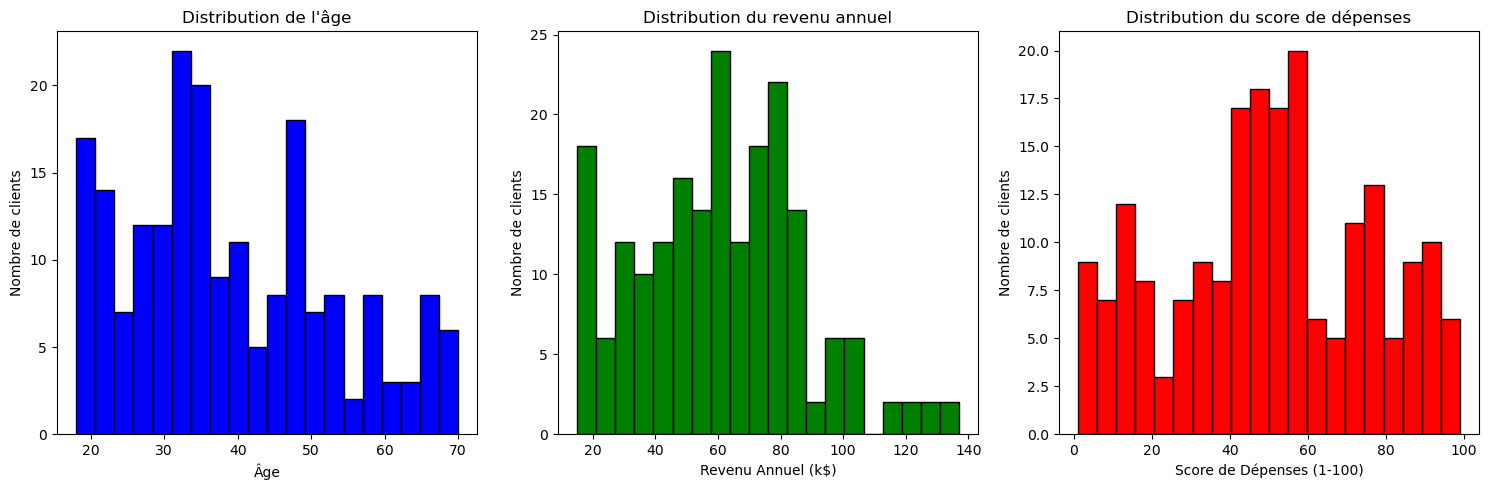

In [19]:
# Créez une figure avec trois sous-graphiques pour les caractéristiques Age, Revenu Annuel et Score de Dépenses
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramme de l'âge
axes[0].hist(data_encoded['Age'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Distribution de l\'âge')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre de clients')

# Histogramme du revenu annuel
axes[1].hist(data_encoded['Annual Income (k$)'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution du revenu annuel')
axes[1].set_xlabel('Revenu Annuel (k$)')
axes[1].set_ylabel('Nombre de clients')

# Histogramme du score de dépenses
axes[2].hist(data_encoded['Spending Score (1-100)'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Distribution du score de dépenses')
axes[2].set_xlabel('Score de Dépenses (1-100)')
axes[2].set_ylabel('Nombre de clients')

plt.tight_layout()
plt.show()

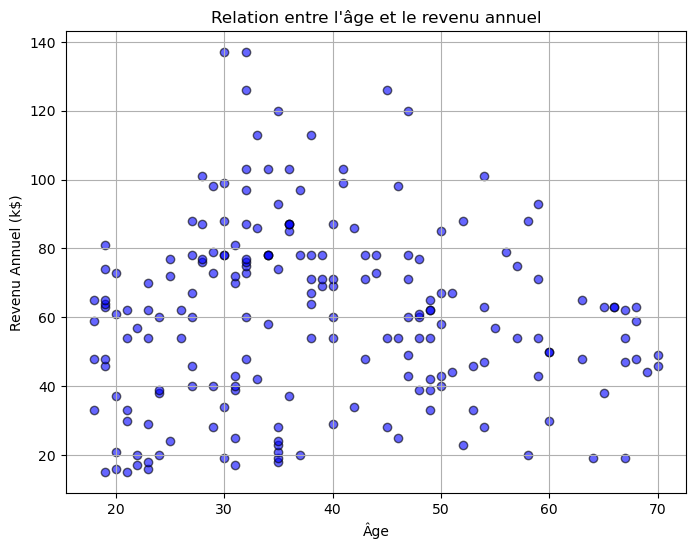

In [21]:
# Création des nuages de points pour montrer la rélation entre l'age des clients et leurs revenus annuels

# Extraire les données de l'âge et du revenu annuel
age = data_encoded['Age']
annual_income = data_encoded['Annual Income (k$)']

# Créer un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(age, annual_income, c='b', marker='o', edgecolor='k', alpha=0.6)
plt.title('Relation entre l\'âge et le revenu annuel')
plt.xlabel('Âge')
plt.ylabel('Revenu Annuel (k$)')

plt.grid(True)
plt.show()

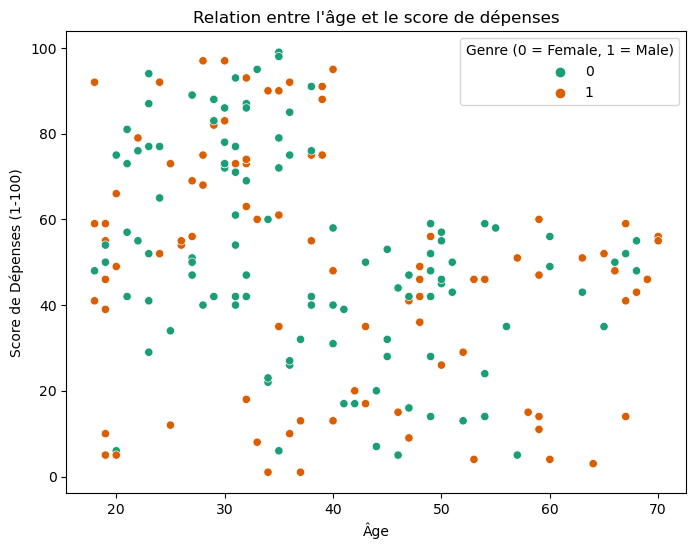

In [23]:
# Création des nuages de points pour montrer la rélation entre l'age des clients et leurs score de dépense

import matplotlib.pyplot as plt
import seaborn as sns



# Créez un nuage de points pour montrer la relation entre l'âge et le score de dépenses
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data_encoded, hue='Gender', palette='Dark2')
plt.title('Relation entre l\'âge et le score de dépenses')
plt.xlabel('Âge')
plt.ylabel('Score de Dépenses (1-100)')
plt.legend(title='Genre (0 = Female, 1 = Male)', loc='upper right')
plt.show()

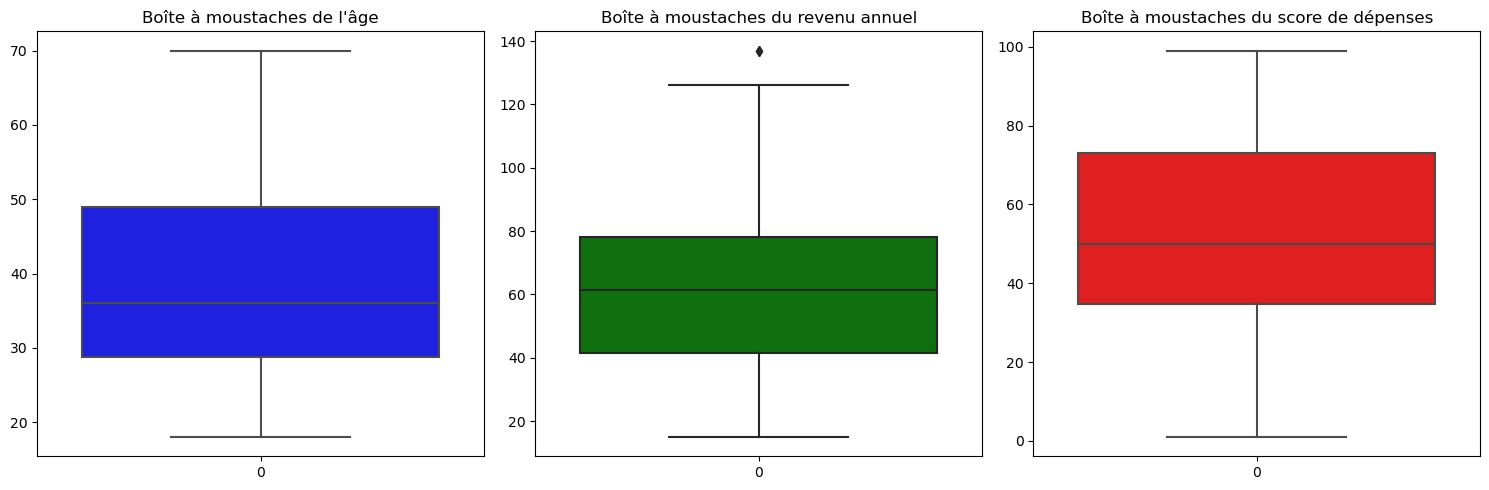

In [24]:
# Créez un ensemble de sous-graphiques pour les trois caractéristiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boîte à moustaches pour l'âge
sns.boxplot(data_encoded['Age'], ax=axes[0], color='blue')
axes[0].set_title('Boîte à moustaches de l\'âge')

# Boîte à moustaches pour le revenu annuel
sns.boxplot(data_encoded['Annual Income (k$)'], ax=axes[1], color='green')
axes[1].set_title('Boîte à moustaches du revenu annuel')

# Boîte à moustaches pour le score de dépenses
sns.boxplot(data_encoded['Spending Score (1-100)'], ax=axes[2], color='red')
axes[2].set_title('Boîte à moustaches du score de dépenses')

plt.tight_layout()
plt.show()

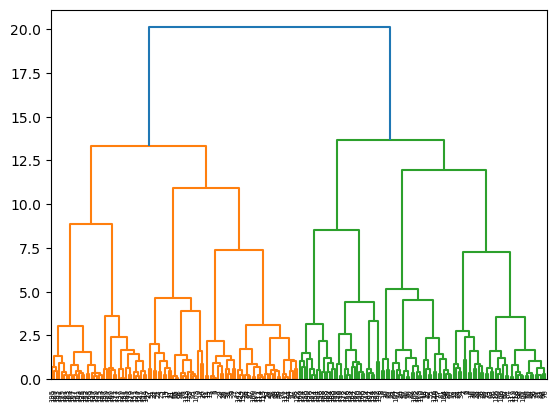

In [25]:
 # Utilisez le clustering hiérarchique pour identifier les regroupements inhérents

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Normalisation des données
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_encoded)

# Construction de la matrice de liaison (linkage matrix)
linkage_matrix = linkage(scaled_df, method='ward')

# Création du dendrogramme
dendrogram(linkage_matrix)
plt.show()

# Découpage dynamique du dendrogramme pour identifier les clusters
threshold = 4  # Choisissez un seuil de distance approprié
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

In [26]:

# Ajoutez les informations sur les clusters à vos données
data_encoded['Cluster'] = clusters

# Tracer un diagramme de dispersion 2D
plt.scatter(data_encoded['Annual Income (k$)'], data_encoded['Spending Score (1-100)'], c=data_encoded['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de Comportement des clients')
plt.show()

TypeError: 'NoneType' object is not subscriptable